In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

##>> Panda untuk membaca dan menulis spreadsheet
##>> Numpy untuk melakukan perhitungan yang efisien
##>>Matplotlib untuk visualisasi data

In [14]:
## Untuk membaca data

driver = pd.read_csv("/content/sample_data/ta_feng_all_months_merged.csv")
driver.head()

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE
0,11/1/2000,1104905,45-49,115,110411,4710199010372,2,24,30
1,11/1/2000,418683,45-49,115,120107,4710857472535,1,48,46
2,11/1/2000,1057331,35-39,115,100407,4710043654103,2,142,166
3,11/1/2000,1849332,45-49,Others,120108,4710126092129,1,32,38
4,11/1/2000,1981995,50-54,115,100205,4710176021445,1,14,18


KeyError: ignored

In [ ]:
## Data masih noisy, maka perlu membersihkan data dengan menghapus kolom yang tidak dibutuhkan
driver = driver.drop(["PRODUCT_SUBCLASS", "PIN_CODE","AGE_GROUP"], axis = 1)
driver.head()

In [18]:
## Untuk menentukan variabel yang akan dikelompokkan
driver_x = driver.iloc[:, 1:3]
driver_x.head()

,CUSTOMER_ID,PRODUCT_ID
0,1104905,4710199010372
1,418683,4710857472535
2,1057331,4710043654103
3,1849332,4710126092129
4,1981995,4710176021445


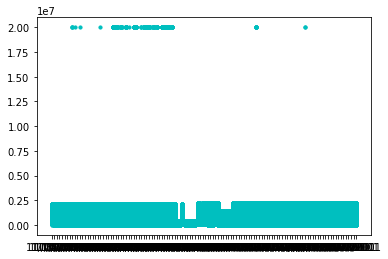

In [19]:
## Untuk menampilkan visualisasi penyebaran data
plt.scatter(driver.TRANSACTION_DT, driver.CUSTOMER_ID, s =10, c = "c", marker = "o", alpha = 1)
plt.show()

In [20]:
## Untuk menentukan nilai K pada clustering
## Untuk mengubah variabel data frame menjadi array
x_array =  np.array(driver_x)
print(x_array)

[[      1104905 4710199010372]
 [       418683 4710857472535]
 [      1057331 4710043654103]
 ...
 [       733526 4716340052307]
 [       173704 4714276145315]
 [      1719888 4713080610231]]


In [21]:
## Membuat ukuran variabel menjadi standar
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.05518923, 0.48114308],
       [0.02087973, 0.48121034],
       [0.05281064, 0.48112721],
       ...,
       [0.03662115, 0.48177038],
       [0.00863135, 0.48155955],
       [0.08593695, 0.48143743]])

In [22]:
## Menentukan dan melakukan konfigurasi pada fungsi K-Means
kmeans = KMeans(n_clusters = 3, random_state=123)
## Menentukan kluster dari data
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [23]:
## Untuk memvisualisasikan kluster harus ditampilkan terlebih dahulu centroid 
## untuk menentukan pusat cluster
print(kmeans.cluster_centers_)

[[0.07025182 0.48197538]
 [0.07023914 0.03297296]
 [0.07074907 0.90902945]]


In [24]:
## Kemudian menampilkan hasul cluster dan menampilkan kolom data frame driver
## Menampilkan hasil kluster
print (kmeans.labels_)
# Menambah kolom "kluster" dalam data frame driver 
driver["kluster"] = kmeans.labels_

[0 0 0 ... 0 0 0]


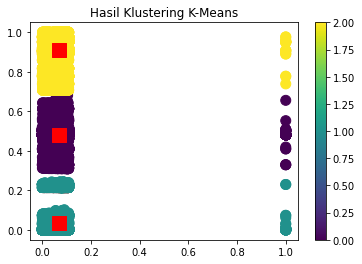

In [25]:
## Kemudian memviasulisasikan hasil clustering
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = driver.kluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="s");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()